In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.decomposition import PCA

# Evaluation of the best subset of data obtained from the imputed case RF

In [2]:
df = pd.read_csv('data/df_best.csv', index_col=0)
X, y = df.iloc[:, :-1], df.iloc[:, -1] 
df.head()

,Var_02,obs_count__0,Var_11,Var_01,Var_21,Var_03,default
0,-0.724064,1,-0.553277,-0.613603,-0.526584,-0.222252,0
1,-0.707214,0,-0.551279,-0.611993,-0.526349,-0.222246,0
2,-0.712806,0,-0.551952,-0.614145,-0.526618,-0.222275,0
3,-0.694199,0,-0.549676,-0.612755,-0.526691,-0.222221,0
4,-0.714466,0,-0.552150,-0.613094,-0.526146,-0.222223,0


## PCA

In [3]:
pca = PCA(n_components=5).fit(X)
X_pca = pca.transform(X)[:, :2]

First two principal components explain most of the variance in data, but looking at the scatter plot and the location of default observations it is not easy to separate data using this approach. 

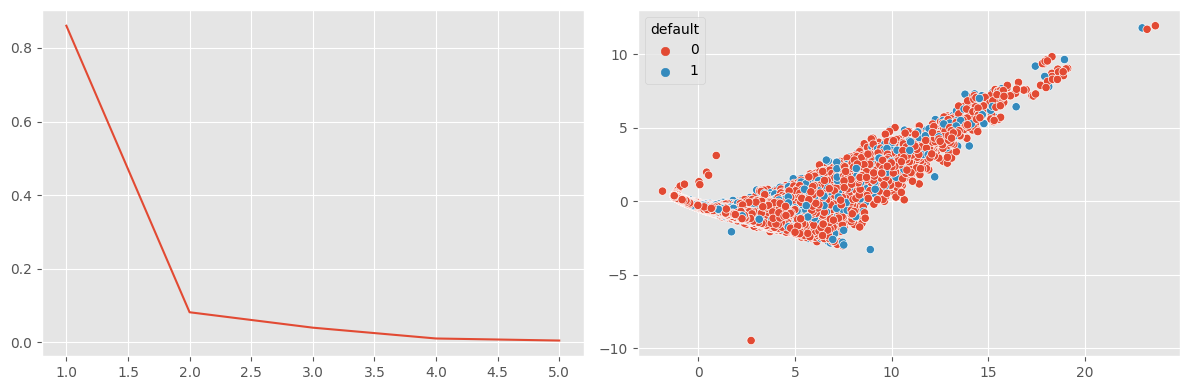

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(np.arange(1, 6), pca.explained_variance_ratio_)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, ax=ax[1])
fig.tight_layout()